# Ola Rides Analytics Project
End-to-End Data Exploration, Cleaning & Feature Engineering

Author: Burhanuddin Farigh

Description:

This script performs data exploration, data cleaning, and feature engineeringon ride-level booking data to prepare a reliable dataset for SQL analysis,

Power BI dashboards, and a Streamlit presentation layer.

In [73]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv("OLA_DataSet.xlsx - July.csv")

# BASIC DATASET OVERVIEW

In [5]:
print("Dataset Shape (Rows, Columns):", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nFirst 5 Records:")
display(df.head())

print("\nLast 5 Records:")
display(df.tail())

Dataset Shape (Rows, Columns): (103024, 20)

Column Names:
 ['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID', 'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT', 'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver', 'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value', 'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'Vehicle Images']

First 5 Records:


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 3:15:00,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...



Last 5 Records:


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
103019,2024-07-31 9:06:00,9:06:00,CNR9488489435,Success,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,NaN,NaN,No,NaN,111,Cash,41,3.6,3.8,https://cdn-icons-png.flaticon.com/128/11409/1...
103020,2024-07-31 15:12:00,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,NaN,NaN,No,NaN,1097,UPI,17,4.3,3.3,https://cdn-icons-png.flaticon.com/128/16526/1...
103021,2024-07-31 13:59:00,13:59:00,CNR1286151233,Success,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,No,NaN,2201,Cash,37,3.6,3.2,https://cdn-icons-png.flaticon.com/128/9983/99...
103022,2024-07-31 14:56:00,14:56:00,CNR2027162035,Success,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,No,NaN,267,UPI,47,3.4,3.1,https://cdn-icons-png.flaticon.com/128/6839/68...
103023,2024-07-31 13:57:00,13:57:00,CNR9770709721,Success,CID217959,Auto,Ulsoor,Hennur,175.0,125.0,NaN,NaN,No,NaN,462,UPI,3,4.8,4.4,https://cdn-icons-png.flaticon.com/128/16526/1...


# DATA TYPES & MEMORY USAGE

In [7]:
print("\nData Types:")
print(df.dtypes)

print("\nDataset Info:")
df.info()


Data Types:
Date                           object
Time                           object
Booking_ID                     object
Booking_Status                 object
Customer_ID                    object
Vehicle_Type                   object
Pickup_Location                object
Drop_Location                  object
V_TAT                         float64
C_TAT                         float64
Canceled_Rides_by_Customer     object
Canceled_Rides_by_Driver       object
Incomplete_Rides               object
Incomplete_Rides_Reason        object
Booking_Value                   int64
Payment_Method                 object
Ride_Distance                   int64
Driver_Ratings                float64
Customer_Rating               float64
Vehicle Images                 object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                  

# MISSING VALUES ANALYSIS

In [9]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Incomplete_Rides_Reason       99098
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
V_TAT                         39057
Customer_Rating               39057
Payment_Method                39057
Incomplete_Rides              39057
C_TAT                         39057
Driver_Ratings                39057
Booking_ID                        0
Time                              0
Date                              0
Booking_Status                    0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
Customer_ID                       0
Booking_Value                     0
Ride_Distance                     0
Vehicle Images                    0
dtype: int64


# UNIQUE VALUE CHECK

In [11]:
print("\nUnique Value Counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique Value Counts:
Date: 40214
Time: 1440
Booking_ID: 103024
Booking_Status: 4
Customer_ID: 94544
Vehicle_Type: 7
Pickup_Location: 50
Drop_Location: 50
V_TAT: 40
C_TAT: 25
Canceled_Rides_by_Customer: 5
Canceled_Rides_by_Driver: 4
Incomplete_Rides: 2
Incomplete_Rides_Reason: 3
Booking_Value: 2883
Payment_Method: 4
Ride_Distance: 50
Driver_Ratings: 21
Customer_Rating: 21
Vehicle Images: 7


# STATISTICAL SUMMARY

In [13]:
print("\nNumerical Columns Summary:")
display(df.describe())

print("\nCategorical Columns Summary:")
display(df.describe(include='object'))


Numerical Columns Summary:


,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
std,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000



Categorical Columns Summary:


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Payment_Method,Vehicle Images
count,103024,103024,103024,103024,103024,103024,103024,103024,10499,18434,63967,3926,63967,103024
unique,40214,1440,103024,4,94544,7,50,50,5,4,2,3,4,7
top,2024-07-01 20:09:00,0:53:00,CNR3204013257,Success,CID954071,Prime Sedan,Banashankari,Peenya,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,Cash,https://cdn-icons-png.flaticon.com/128/14183/1...
freq,10,101,1,63967,5,14877,2201,2159,3175,6542,60041,1601,35022,14877


# KEY BUSINESS COLUMN CHECKS
# Booking Status Distribution

In [37]:
if 'Booking_Status' in df.columns:
    print("\nBooking Status Distribution:")
    print(df['Booking_Status'].value_counts(dropna=False))
else:
    print(" 'booking_status' column not found")


Booking Status Distribution:
Booking_Status
Success                 63967
Canceled by Driver      18434
Canceled by Customer    10499
Driver Not Found        10124
Name: count, dtype: int64


# Vehicle Type Distribution

In [36]:
if 'Vehicle_Type' in df.columns:
    print("\nVehicle Type Distribution:")
    print(df['Vehicle_Type'].value_counts(dropna=False))
else:
    print(" 'vehicle_type' column not found")


Vehicle Type Distribution:
Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: count, dtype: int64


# Payment Method Distribution

In [34]:
if 'Payment_Method' in df.columns:
    print("\nPayment Method Distribution:")
    print(df['Payment_Method'].value_counts())
else:
    print("Column 'payment_method' NOT FOUND")


Payment Method Distribution:
Payment_Method
Cash           35022
UPI            25881
Credit Card     2435
Debit Card       629
Name: count, dtype: int64


# INVALID / OUTLIER CHECKS
#Negative or zero ride distance

In [38]:
if 'Ride_Distance' in df.columns:
    invalid_distance = df[df['Ride_Distance'] <= 0]

    print("\nInvalid Ride Distance Records:")
    if invalid_distance.empty:
        print(" No invalid ride distance records found")
    else:
        print(invalid_distance)
else:
    print(" 'ride_distance' column not found")


Invalid Ride Distance Records:
                       Date      Time     Booking_ID        Booking_Status  \
0       2024-07-26 14:00:00  14:00:00  CNR7153255142    Canceled by Driver   
3        2024-07-22 3:15:00   3:15:00  CNR2395710036  Canceled by Customer   
7       2024-07-11 11:12:00  11:12:00  CNR5374902489    Canceled by Driver   
8       2024-07-01 19:19:00  19:19:00  CNR5030602354      Driver Not Found   
9        2024-07-18 1:31:00   1:31:00  CNR6328453219    Canceled by Driver   
...                     ...       ...            ...                   ...   
103008  2024-07-31 14:38:00  14:38:00  CNR9936519920      Driver Not Found   
103010   2024-07-31 7:28:00   7:28:00  CNR2746062760    Canceled by Driver   
103014  2024-07-31 17:11:00  17:11:00  CNR8606968614      Driver Not Found   
103015  2024-07-31 17:43:00  17:43:00  CNR1504131542    Canceled by Driver   
103016   2024-07-31 9:20:00   9:20:00  CNR3395373353      Driver Not Found   

       Customer_ID Vehicle_Type

# Invalid ratings (expected range 1–5)

In [39]:
rating_cols = ['Customer_Rating', 'Driver_Rating']

for col in rating_cols:
    if col in df.columns:
        invalid_ratings = df[(df[col] < 1) | (df[col] > 5)]

        print(f"\nInvalid {col} values:")
        if invalid_ratings.empty:
            print(f" No invalid {col} values found")
        else:
            print(invalid_ratings)
    else:
        print(f" '{col}' column not found")


Invalid Customer_Rating values:
 No invalid Customer_Rating values found
 'Driver_Rating' column not found


# INITIAL VISUAL EDA
# Ride Distance Distribution

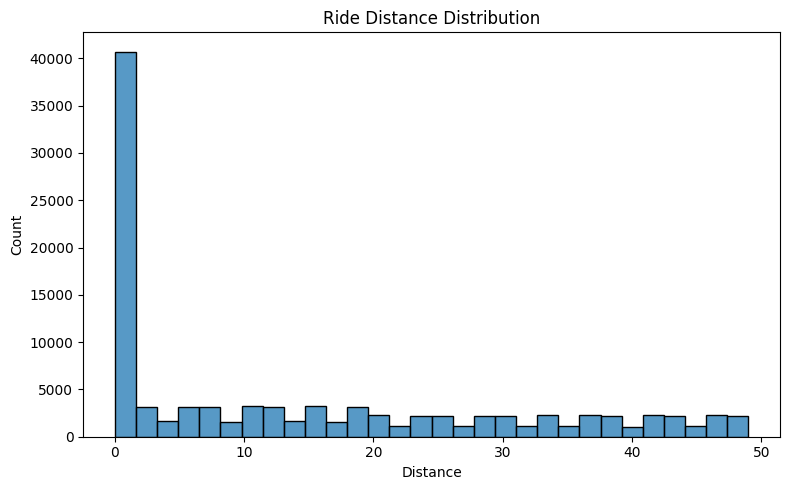

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Ride_Distance'], bins=30)
plt.title("Ride Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Booking Value Distribution

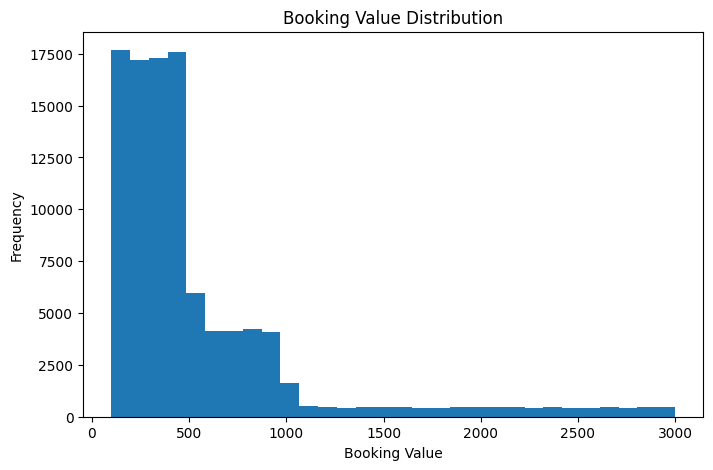

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df['Booking_Value'].dropna(), bins=30)
plt.title("Booking Value Distribution")
plt.xlabel("Booking Value")
plt.ylabel("Frequency")
plt.show()

# Customer rating distribution

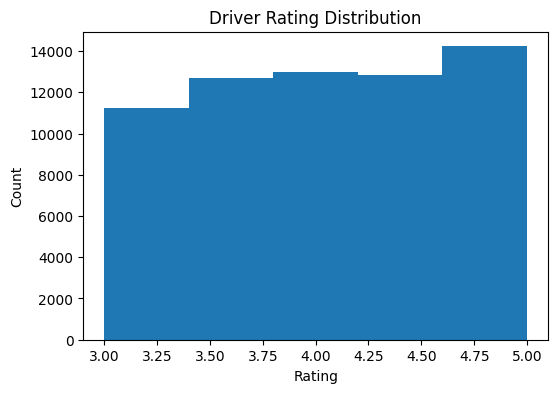

In [32]:
plt.figure(figsize=(6,4))
plt.hist(df['Driver_Ratings'].dropna(), bins=5)
plt.title("Driver Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [41]:
print("EDA Completed")

EDA Completed


## Data Cleaning 

In [42]:
# STANDARDIZE COLUMNS NAMES 

In [43]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())

['date', 'time', 'booking_id', 'booking_status', 'customer_id', 'vehicle_type', 'pickup_location', 'drop_location', 'v_tat', 'c_tat', 'canceled_rides_by_customer', 'canceled_rides_by_driver', 'incomplete_rides', 'incomplete_rides_reason', 'booking_value', 'payment_method', 'ride_distance', 'driver_ratings', 'customer_rating', 'vehicle_images']


In [44]:
# CONVERT BOOKING DATE TIME 

In [83]:
df['booking_datetime'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time'].astype(str),
    errors='coerce'
)

df.drop(['date', 'time'], axis=1, inplace=True)

KeyError: 'date'

# DERIVED FEATURES

In [48]:
df['ride_day'] = df['date'].dt.day_name()
df['ride_month'] = df['date'].dt.month
df['ride_hour'] = df['date'].dt.hour

# CLEAN BOOKING STATUS 

In [91]:
df['booking_status'] = df['booking_status'].str.strip().str.title()
print(df['booking_status'].value_counts())

booking_status
Completed    63967
Name: count, dtype: int64


# MISSING VALUES HANDLED 

In [55]:
#RATING
df['customer_rating'] = df['customer_rating'].fillna(0)
df['driver_ratings'] = df['driver_ratings'].fillna(0)


#BOOKING VALUE
df['booking_value'] = df['booking_value'].fillna(0)

#RIDE DISTANCE
df = df[df['ride_distance'] > 0]



# DERIVED BUSINESS FEATURES

In [84]:
# COMPLETED RIDE FLAG

df['booking_status'] = df['booking_status'].str.strip().str.lower()

df['booking_status'] = df['booking_status'].replace({
    'success': 'Completed'
})


In [93]:
df['completed_flag'] = df['booking_status'].apply(
    lambda x: 1 if x == 'Completed' else 0
)

In [92]:
df['booking_status'].value_counts()
df['completed_flag'].value_counts()


completed_flag
0    63967
Name: count, dtype: int64

In [70]:
# CANCELLED BY CUSTOMER/DRIVER

df['cancelled_by'] = 'NA'
df.loc[df['booking_status'] == 'Cancelled', 'cancelled_by'] = 'Unknown'

C:\Users\burha\AppData\Local\Temp\ipykernel_25080\257350503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cancelled_by'] = 'NA'


# CLEAN PAYMENTS AND VEHICLE FEILDS

In [61]:
df['payment_method'] = df['payment_method'].str.strip().str.upper()
df['vehicle_type'] = df['vehicle_type'].str.strip().str.title()


C:\Users\burha\AppData\Local\Temp\ipykernel_25080\658776840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_method'] = df['payment_method'].str.strip().str.upper()
C:\Users\burha\AppData\Local\Temp\ipykernel_25080\658776840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_type'] = df['vehicle_type'].str.strip().str.title()


# Droped some columns 

In [79]:
df.drop(['incomplete_rides_reason'], axis=1, inplace=True)

df.drop(['incomplete_rides'], axis=1, inplace=True)



# FINAL VALIDATION CHECK 

In [81]:
print(df.isnull().sum())
print(df.dtypes)

booking_id          0
booking_status      0
customer_id         0
vehicle_type        0
pickup_location     0
drop_location       0
v_tat               0
c_tat               0
booking_value       0
payment_method      0
ride_distance       0
driver_ratings      0
customer_rating     0
vehicle_images      0
ride_day            0
ride_month          0
ride_hour           0
completed_flag      0
cancelled_by        0
booking_datetime    0
dtype: int64
booking_id                  object
booking_status              object
customer_id                 object
vehicle_type                object
pickup_location             object
drop_location               object
v_tat                      float64
c_tat                      float64
booking_value                int64
payment_method              object
ride_distance                int64
driver_ratings             float64
customer_rating            float64
vehicle_images              object
ride_day                    object
ride_month            

# SAVE CLEAN DATASET

In [95]:
df.to_csv("ola_rides_cleaned.csv", index=False)

In [96]:
df.head()

,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,v_tat,c_tat,booking_value,payment_method,ride_distance,driver_ratings,customer_rating,vehicle_images,ride_day,ride_month,ride_hour,cancelled_by,booking_datetime,completed_flag
1,CNR2940424040,Completed,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,158,CASH,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,Thursday,7,22,NA,2024-07-25 22:20:00,1
2,CNR2982357879,Completed,CID270156,Prime Suv,Sahakar Nagar,Varthur,238.0,130.0,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,Tuesday,7,19,NA,2024-07-30 19:59:00,1
4,CNR1797421769,Completed,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,822,CREDIT CARD,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,Tuesday,7,9,NA,2024-07-02 09:02:00,1
5,CNR8787177882,Completed,CID802429,Mini,Kadugodi,Vijayanagar,231.0,90.0,173,UPI,41,3.4,4.6,https://cdn-icons-png.flaticon.com/128/3202/32...,Saturday,7,4,NA,2024-07-13 04:42:00,1
6,CNR3612067560,Completed,CID476071,Bike,Tumkur Road,Whitefield,133.0,40.0,140,CASH,49,3.2,4.5,https://cdn-icons-png.flaticon.com/128/9983/99...,Tuesday,7,9,NA,2024-07-23 09:51:00,1
